<h1><font color='green'>Instance Segmentation on Indian driving dataset

In [ ]:
""" with python docstrings """

<h3><font color='orange'>Using GPU

In [0]:
# https://www.tensorflow.org/api_docs/python/tf/test/gpu_device_name

import tensorflow as tf

"""
Google provides free GPU in 
google colab so with this code
we make sure that GPU allocated or not
or you can try with your laptop for GPU 
assigned or not

it basically Returns the name of a GPU device if available 
or the empty string.
"""

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


<h2><font color='purple'>Installing pycocotools

In [0]:
#Installing some packages
"""
these are required libraries
to install
"""

!pip install Cython
!pip install utils

In [0]:
#cloning pycocotools from github
"""
cloning the pycocotools from the github 
using the git command
to use git command you need
to install git sofware on your pc
and make sure put the path in
environment variables.
"""
!git clone https://github.com/waleedka/coco

Cloning into 'coco'...
remote: Enumerating objects: 904, done.
remote: Total 904 (delta 0), reused 0 (delta 0), pack-reused 904
Receiving objects: 100% (904/904), 10.38 MiB | 11.75 MiB/s, done.
Resolving deltas: 100% (542/542), done.


In [0]:
#installing some packages
"""
Installing some pakages
fot maks rcnn
"""

!pip install -U setuptools
!pip install -U wheel
!make install -C coco/PythonAPI

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (41.4.0)
Requirement already up-to-date: wheel in /usr/local/lib/python3.6/dist-packages (0.33.6)
make: Entering directory '/content/coco/PythonAPI'
# install pycocotools to the Python site-packages
python setup.py build_ext install
Compiling pycocotools/_mask.pyx because it changed.
[1/1] Cythonizing pycocotools/_mask.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/coco/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'pycocotools._mask' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
creating build/common
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security

In [0]:
#Cloning Mask_RCNN from github
#https://github.com/matterport/Mask_RCNN
"""
we need to clone the Mask R-CNN
make sure its correctly cloned
because we are going to use some of the libraries also
from Mask R-CNN to segmentation.
"""
!git clone https://github.com/matterport/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.90 MiB | 27.29 MiB/s, done.
Resolving deltas: 100% (571/571), done.


In [0]:

!ls
import os

"""
ls command basically used to list the directories
we imported os
and chdir command to used to changing the directory to another 
these are like cmd commands
"""

os.chdir('./Mask_RCNN')

coco  Mask_RCNN  sample_data


<h2><font color='purple'>Mask_RCNN

In [0]:
"""  Using pretrained models to detect the segmentation """
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
""" importing some of the libraries """

"""
ROOT_DIR in this we mentioned 
root directory path
for further use
"""

""" Root directory of the project """
ROOT_DIR = os.path.abspath("../")

""" Import Mask RCNN and To find local version of the library """
sys.path.append(ROOT_DIR)  
"""
we imported Mask R-CNN 
in root directory
"""
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
"""
we imported pycocotools
for use
"""

import coco
%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
"""
MODEL_DIR in this we save the logs
and the trained model
"""

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

"""
this is importent to load the weights
from directory if you don't downloaded
the weights make sure you download it
and load it
"""

    
# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")
"""
in this directory we have all images of 
indian driving dataset
this path is used to load 
the all images from the path
"""


Using TensorFlow backend.


... done downloading pretrained model!


<h2><font color='purple'> Configurations</font></h2>

We'll be using a model trained on the MS-COCO dataset. The configurations of this model are in the CocoConfig class in coco.py.

For inferencing, modify the configurations a bit to fit the task. To do so, sub-class the CocoConfig class and override the attributes you need to change.

In [0]:
from samples.coco import coco

class InferenceConfig(coco.CocoConfig):
    """
    Set batch size to 1 since we'll be running inference on
    one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    """
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

<h2><font color='purple'>Create Model and Load Trained Weights

In [0]:
""" Create model object in inference mode """
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
"""
modellib.MaskRCNN is used to
create the model object
its a maskrcnn library
"""
""" Load weights trained on MS-COCO """
model.load_weights(COCO_MODEL_PATH, by_name=True)
"""
this is used to
load the weights of the
coco model
above we mentioned path only
but now we are loading the 
weights
"""









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.








## Class Names
The model classifies objects and returns class IDs, which are integer value that identify each class. Some datasets assign integer values to their classes and some don't. For example, in the MS-COCO dataset, the 'person' class is 1 and 'teddy bear' is 88. The IDs are often sequential, but not always. The COCO dataset, for example, has classes associated with class IDs 70 and 72, but not 71.

To improve consistency, and to support training on data from multiple sources at the same time, our Dataset class assigns it's own sequential integer IDs to each class. For example, if you load the COCO dataset using our Dataset class, the 'person' class would get class ID = 1 (just like COCO) and the 'teddy bear' class is 78 (different from COCO). Keep that in mind when mapping class IDs to class names.

To get the list of class names, you'd load the dataset and then use the class_names property like this.

    #Load COCO dataset
      dataset = coco.CocoDataset()
      dataset.load_coco(COCO_DIR, "train")
      dataset.prepare()
 
    # Print class names
      print(dataset.class_names)

We don't want to require you to download the COCO dataset just to run this demo, so we're including the list of class names below. The index of the class name in the list represent its ID (first class is 0, second is 1, third is 2, ...etc.)

In [0]:
# COCO Class names
"""
Index of the class in the list is its ID. For example, to get ID of
the car class, use: class_names.index('car')
"""

class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

<h2><font color='purple'>Run Object detection

Processing 1 images
image                    shape: (964, 1280, 3)        min:    8.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


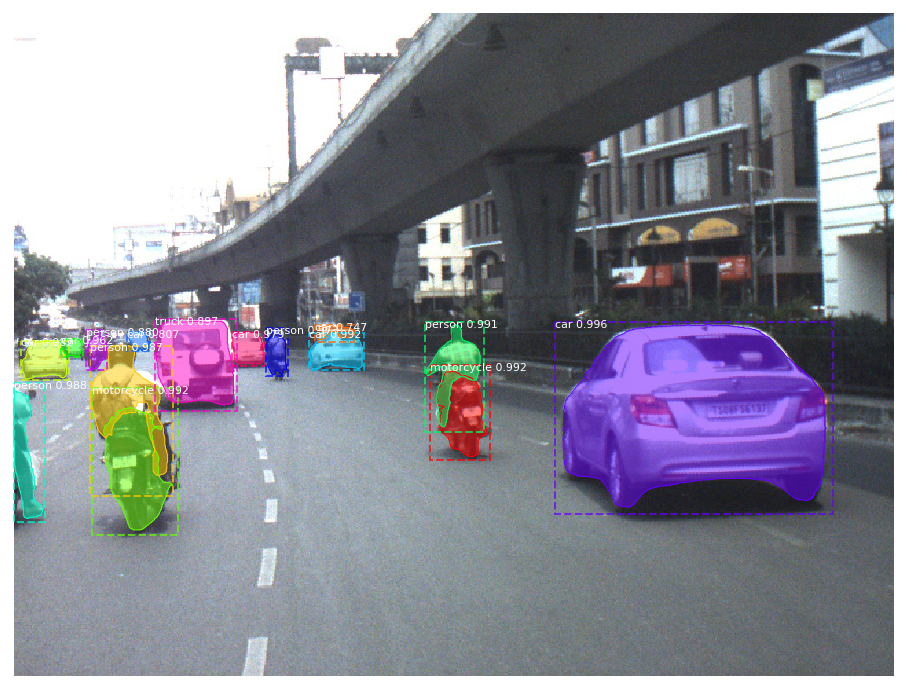

In [0]:
# Load a random image from the images folder
file_names = next(os.walk("images"))[2]
image = skimage.io.imread(os.path.join("images", "0013080.jpg"))
"""
first we defined os.walk for
path because in the images folder
we have all the images of the indian driving dataset
so after that skimages.io.imread is used to 
load the image from the folder

"""
# Run detection
results = model.detect([image], verbose=1)
"""
model.detect function is used
to detect the class labels in the iamges

"""
# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
"""
after processing the image
now we need to see the image
it detected class labels or not

"""

Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


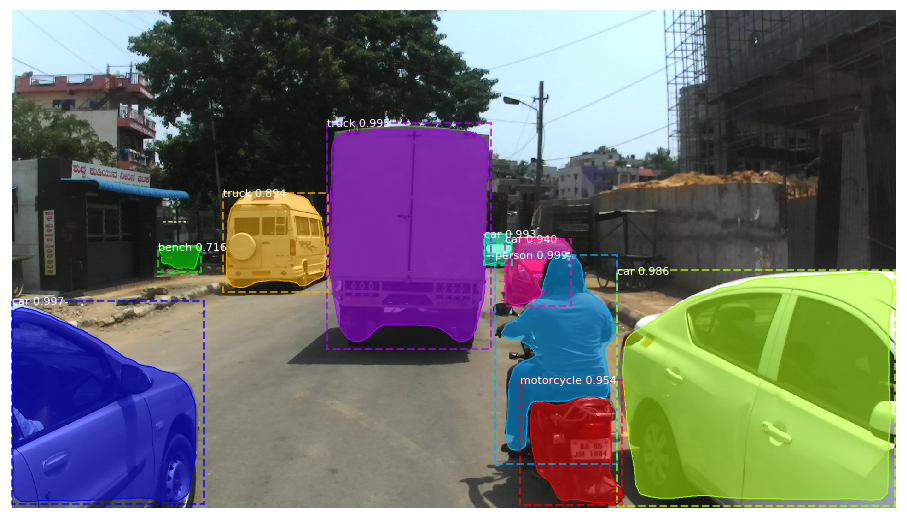

In [0]:
""" Load a random image from the images folder """
file_names = next(os.walk("images"))[2]
image = skimage.io.imread(os.path.join("images", "0001260.jpg"))
"""
first we defined os.walk for
path because in the images folder
we have all the images of the indian driving dataset
so after that skimages.io.imread is used to 
load the image from the folder

"""

""" Run detection """
results = model.detect([image], verbose=1)
"""
model.detect function is used
to detect the class labels in the iamges

"""

""" Visualize results """

r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
"""
after processing the image
now we need to see the image
it detected class labels or not
"""


<h2><font color='purple'>Processing on IDD dataset

In [40]:
import cv2
import numpy as np

def random_colors(N):
    np.random.seed(1)
    colors = [tuple(255 * np.random.rand(3)) for _ in range(N)]
    return colors


def apply_mask(image, mask, color, alpha=0.5):
    """apply mask to image"""
    for n, c in enumerate(color):
        image[:, :, n] = np.where(
            mask == 1,
            image[:, :, n] * (1 - alpha) + alpha * c,
            image[:, :, n]
        )
    return image


def display_instances(image, boxes, masks, ids, names, scores):
    """
        take the image and results and apply the mask, box, and Label
    """
    n_instances = boxes.shape[0]
    colors = random_colors(n_instances)

    if not n_instances:
        print('NO INSTANCES TO DISPLAY')
    else:
        assert boxes.shape[0] == masks.shape[-1] == ids.shape[0]

    for i, color in enumerate(colors):
        if not np.any(boxes[i]):
            continue

        y1, x1, y2, x2 = boxes[i]
        label = names[ids[i]]
        score = scores[i] if scores is not None else None
        caption = '{} {:.2f}'.format(label, score) if score else label
        mask = masks[:, :, i]

        image = apply_mask(image, mask, color)
        image = cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        image = cv2.putText(
            image, caption, (x1, y1), cv2.FONT_HERSHEY_COMPLEX, 0.7, color, 2
        )

    return image


if __name__ == '__main__':
    """
        test everything
    """
    import os
    import sys
    import random
    import math
    import numpy as np
    import skimage.io
    import matplotlib
    import matplotlib.pyplot as plt
    ROOT_DIR = os.path.abspath("../")
    sys.path.append(ROOT_DIR)
    from mrcnn import utils
    batch_size = 15
    import mrcnn.model as modellib
    from mrcnn import visualize
    sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))
    import coco
    %matplotlib inline 
    ROOT_DIR = os.getcwd()
    MODEL_DIR = os.path.join(ROOT_DIR, "logs")
    VIDEO_DIR = os.path.join(ROOT_DIR, "videos")
    VIDEO_SAVE_DIR = os.path.join(VIDEO_DIR, "saves2")
    COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
    """ loading the weights """
    if not os.path.exists(COCO_MODEL_PATH):
        """ downloading the weights """
        utils.download_trained_weights(COCO_MODEL_PATH)
    
    from samples.coco import coco
    class InferenceConfig(coco.CocoConfig):
        """ configuring the coco tools """
        GPU_COUNT = 1
        IMAGES_PER_GPU = 15

    config = InferenceConfig()
    config.display()

    model = modellib.MaskRCNN(
        mode="inference", model_dir=MODEL_DIR, config=config
    )
    """ create the mask rcnn model """
    model.load_weights(COCO_MODEL_PATH, by_name=True)
    """loading the weights and mentioning the class weights """
    class_names = [
        'BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
        'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
        'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
        'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
        'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
        'kite', 'baseball bat', 'baseball glove', 'skateboard',
        'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
        'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
        'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
        'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
        'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
        'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
        'teddy bear', 'hair drier', 'toothbrush'
    ]

    capture = cv2.VideoCapture(os.path.join("videos", 'video.mp4'))
    try:
        if not os.path.exists(VIDEO_SAVE_DIR):
            os.mkdir(VIDEO_SAVE_DIR)
    except OSError:
        print ('Error: Creating directory of data')
    frames = []
    frame_count = 0
    """ these 2 lines can be removed if you dont have a 1080p images """
    capture.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
    capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

    while True:
        ret, frame = capture.read()
        """ Bail out when the video file ends """
        if not ret:
            break
        
        """ Save each frame of the 
        video to a list """
        
        frame_count += 1
        frames.append(frame)
        print('frame_count :{0}'.format(frame_count))
        if len(frames) == batch_size:
            results = model.detect(frames, verbose=0)
            print('Predicted')
            for i, item in enumerate(zip(frames, results)):
                frame = item[0]
                r = item[1]
                frame = display_instances(
                    frame, r['rois'], r['masks'], r['class_ids'], class_names, r['scores']
                )
                name = '{0}.jpg'.format(frame_count + i - batch_size)
                name = os.path.join(VIDEO_SAVE_DIR, name)
                cv2.imwrite(name, frame)
                print('writing to file:{0}'.format(name))
            """ Clear the frames array to start the next batch """
            frames = []

    capture.release()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     15
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 15
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE       

KeyboardInterrupt: ignored

<h2><font color='orange'>Conclusion

- Performing Instance Segmentation on Indian driving dataset
- I'm performed using the Mask_RCNN
- in order to do that you need to install some tools
- and also clone Mask_RCNN and coco tools for segmentation
- so this whole thing i performed on google colab
- firstly i checked the GPU on google colab(if its enable or not if not enable it)
- Then i install cython and utils
- and clone the coco tools and install setuptools and setup coco tools
- and then clone the Mask_RCNN
- before that you have to load the weights of Mask_RCNN
- after that configure the coco tools
- and created model and load train weights
- next i given class names
- after that i load the single image from idd dataset
- then we got output which detected the image labels
- and after that i given all images (which i already combined them into video)
- then its detected all the images
- so after that i combined them into video
- with Mask_RCNN we can detect all the images labels.
